# Sparse Dreams: Sparse Coding & Wake-Sleep Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import math
from tqdm import tqdm

# See helmholtz.py and sparse_coding.py
import helmholtz as hm
from sparse_coding import calc_LCA, calc_Phi, SparseCodingModel

# To Delete Later
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces

# Load Raw Images

In [46]:
def get_face_images(num_images=5):
    faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
    n_samples, n_features = faces.shape
    image_shape = (64, 64)
    # global centering
    faces_centered = faces - faces.mean(axis=0)
    # local centering
    faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)
    return faces_centered[:num_images], image_shape

# Gets MNIST images for a given number. (ie. if number=1, all images of 1 are returned)
def get_mnist_images(number=1):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # X = (np.concatenate((x_train, x_test), axis = 0).reshape((len(x_train)+len(x_test), 28*28)) > .5).astype(float)
    X = ((np.concatenate((x_train, x_test), axis = 0))).astype(float) 
    y = np.concatenate((y_train, y_test), axis = 0)
    print(X.shape, y.shape)

    # Isolate Ones
    digit = X[np.where(y == 8)]
    digit = (digit.reshape((len(digit), 1, 28*28))).astype(float)
    print(digit.shape)
    plt.imshow(digit.reshape((len(digit),28,28))[0]/255, cmap='gray')
    plt.show()

# Create Sparse Coding Model

In [48]:
X_train, image_shape = get_face_images(num_images=20)#create_images(256, 16, 16)

input_size = image_shape[0]*image_shape[1]
n_activations = 32
alpha = 0.001
model = SparseCodingModel(input_size, n_activations, alpha)

model.train(X_train)

100% (2000 of 2000) |####################| Elapsed Time: 0:13:14 Time:  0:13:14


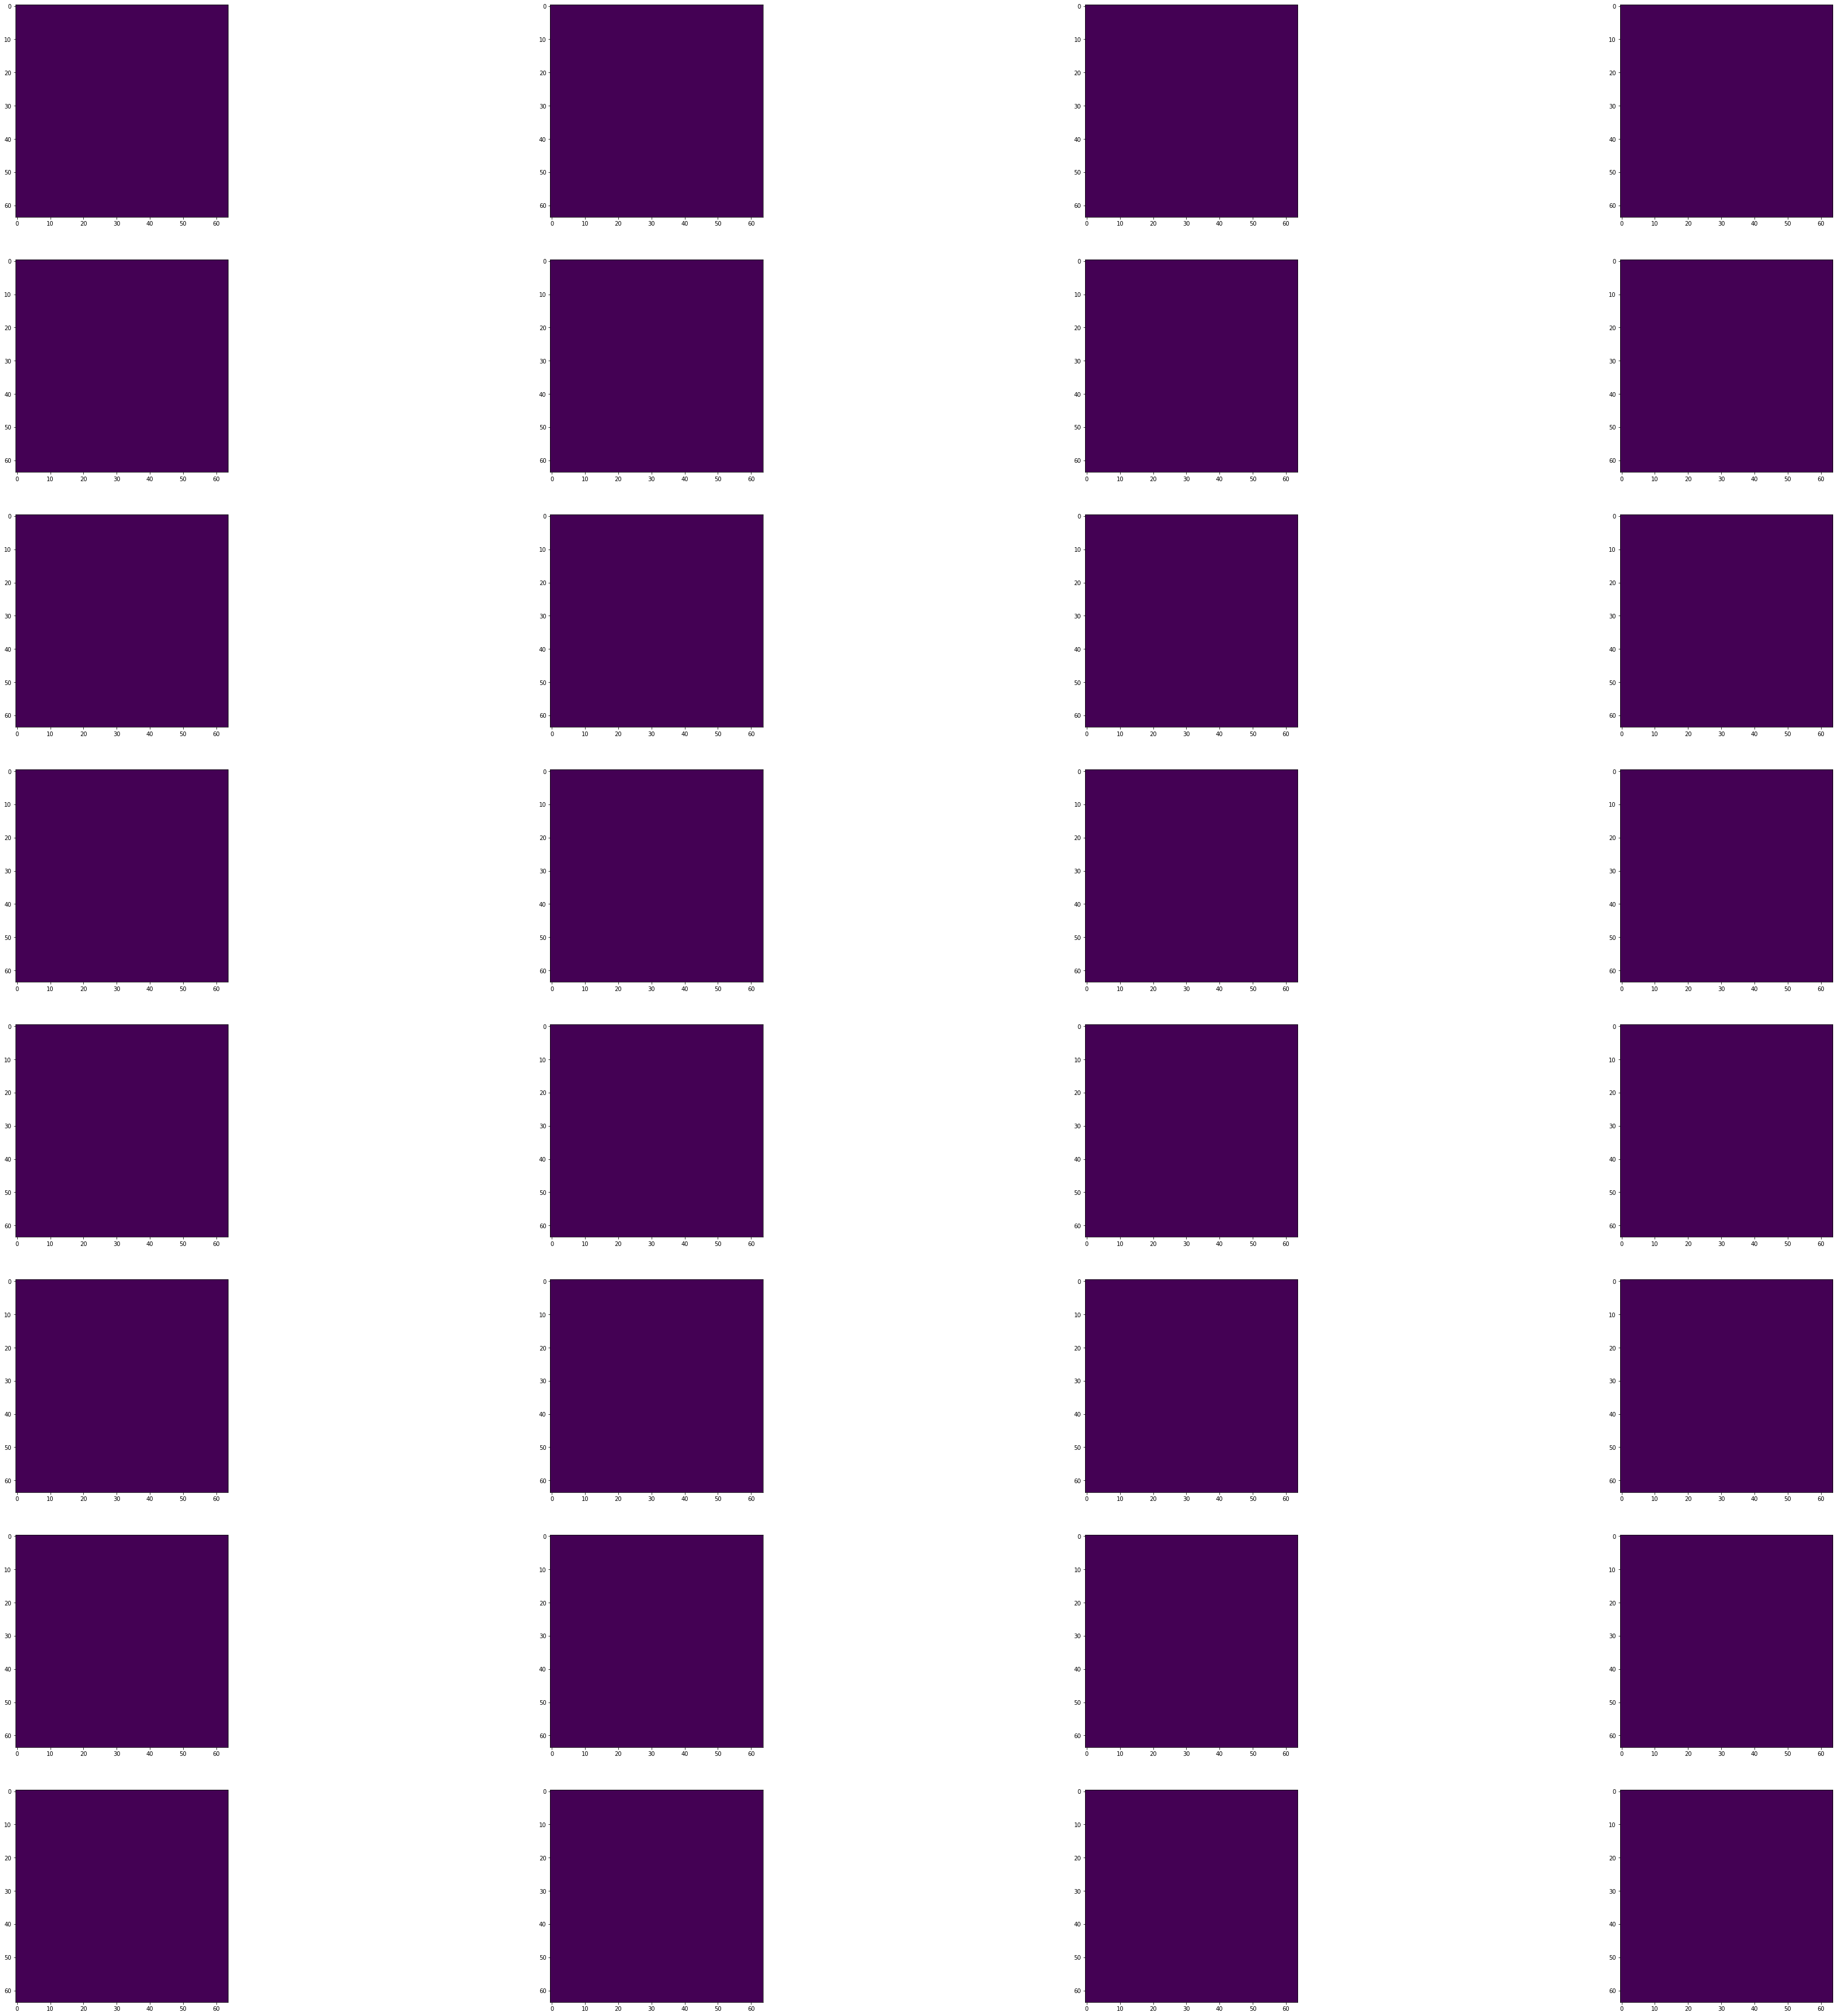

In [49]:
# Feature Library
fig=plt.figure(figsize=image_shape)
columns = 4
rows = 8
for i in range(32):
    img = model.Phi[:, i].reshape(image_shape)
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
plt.show()

In [53]:
# Predict Activations From Test Images
X_test, _ = get_face_images(num_images=10)
activations = model.predict(X_test, num_steps=3000)

# Generate Images from Activations
X_pred = model.generate(activations)

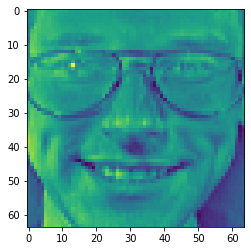

In [54]:
plt.imshow(X_test[7].reshape(image_shape))

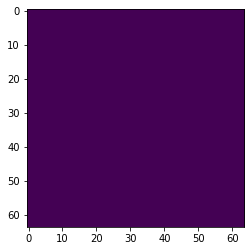

In [55]:
plt.imshow(X_pred[:, 7].reshape(image_shape))